# Clustering
Load the datafile and explore the data, showing size, and data distributions.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
url = './exam_income.csv'
df = pd.read_csv(url)

print("Shape of the df is {}".format(df.shape))
df.head()

Shape of the df is (7891, 11)


,Unnamed: 0,Territorio,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,0,Abano Terme,0.0,3641.0,1997.0,4567.0,3268.0,413.0,400.0,177.0,347774542.0
1,1,Abbadia Cerreto,0.0,50.0,29.0,73.0,41.0,0.0,0.0,0.0,3399810.0
2,2,Abbadia Lariana,0.0,511.0,276.0,792.0,656.0,78.0,48.0,31.0,59153455.0
3,3,Abbadia San Salvatore,0.0,1303.0,783.0,1820.0,754.0,69.0,33.0,13.0,87615654.0
4,4,Abbasanta,0.0,577.0,194.0,443.0,430.0,26.0,13.0,0.0,30992769.0


We can see that the column 'Territorio' has string values, so we can drop that column: looks like it's useless.
Same for the first column.

In [74]:

df = df.drop(columns='Territorio')
df = df.drop(columns='Unnamed: 0')
df.head()

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,0.0,3641.0,1997.0,4567.0,3268.0,413.0,400.0,177.0,347774542.0
1,0.0,50.0,29.0,73.0,41.0,0.0,0.0,0.0,3399810.0
2,0.0,511.0,276.0,792.0,656.0,78.0,48.0,31.0,59153455.0
3,0.0,1303.0,783.0,1820.0,754.0,69.0,33.0,13.0,87615654.0
4,0.0,577.0,194.0,443.0,430.0,26.0,13.0,0.0,30992769.0


/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grou

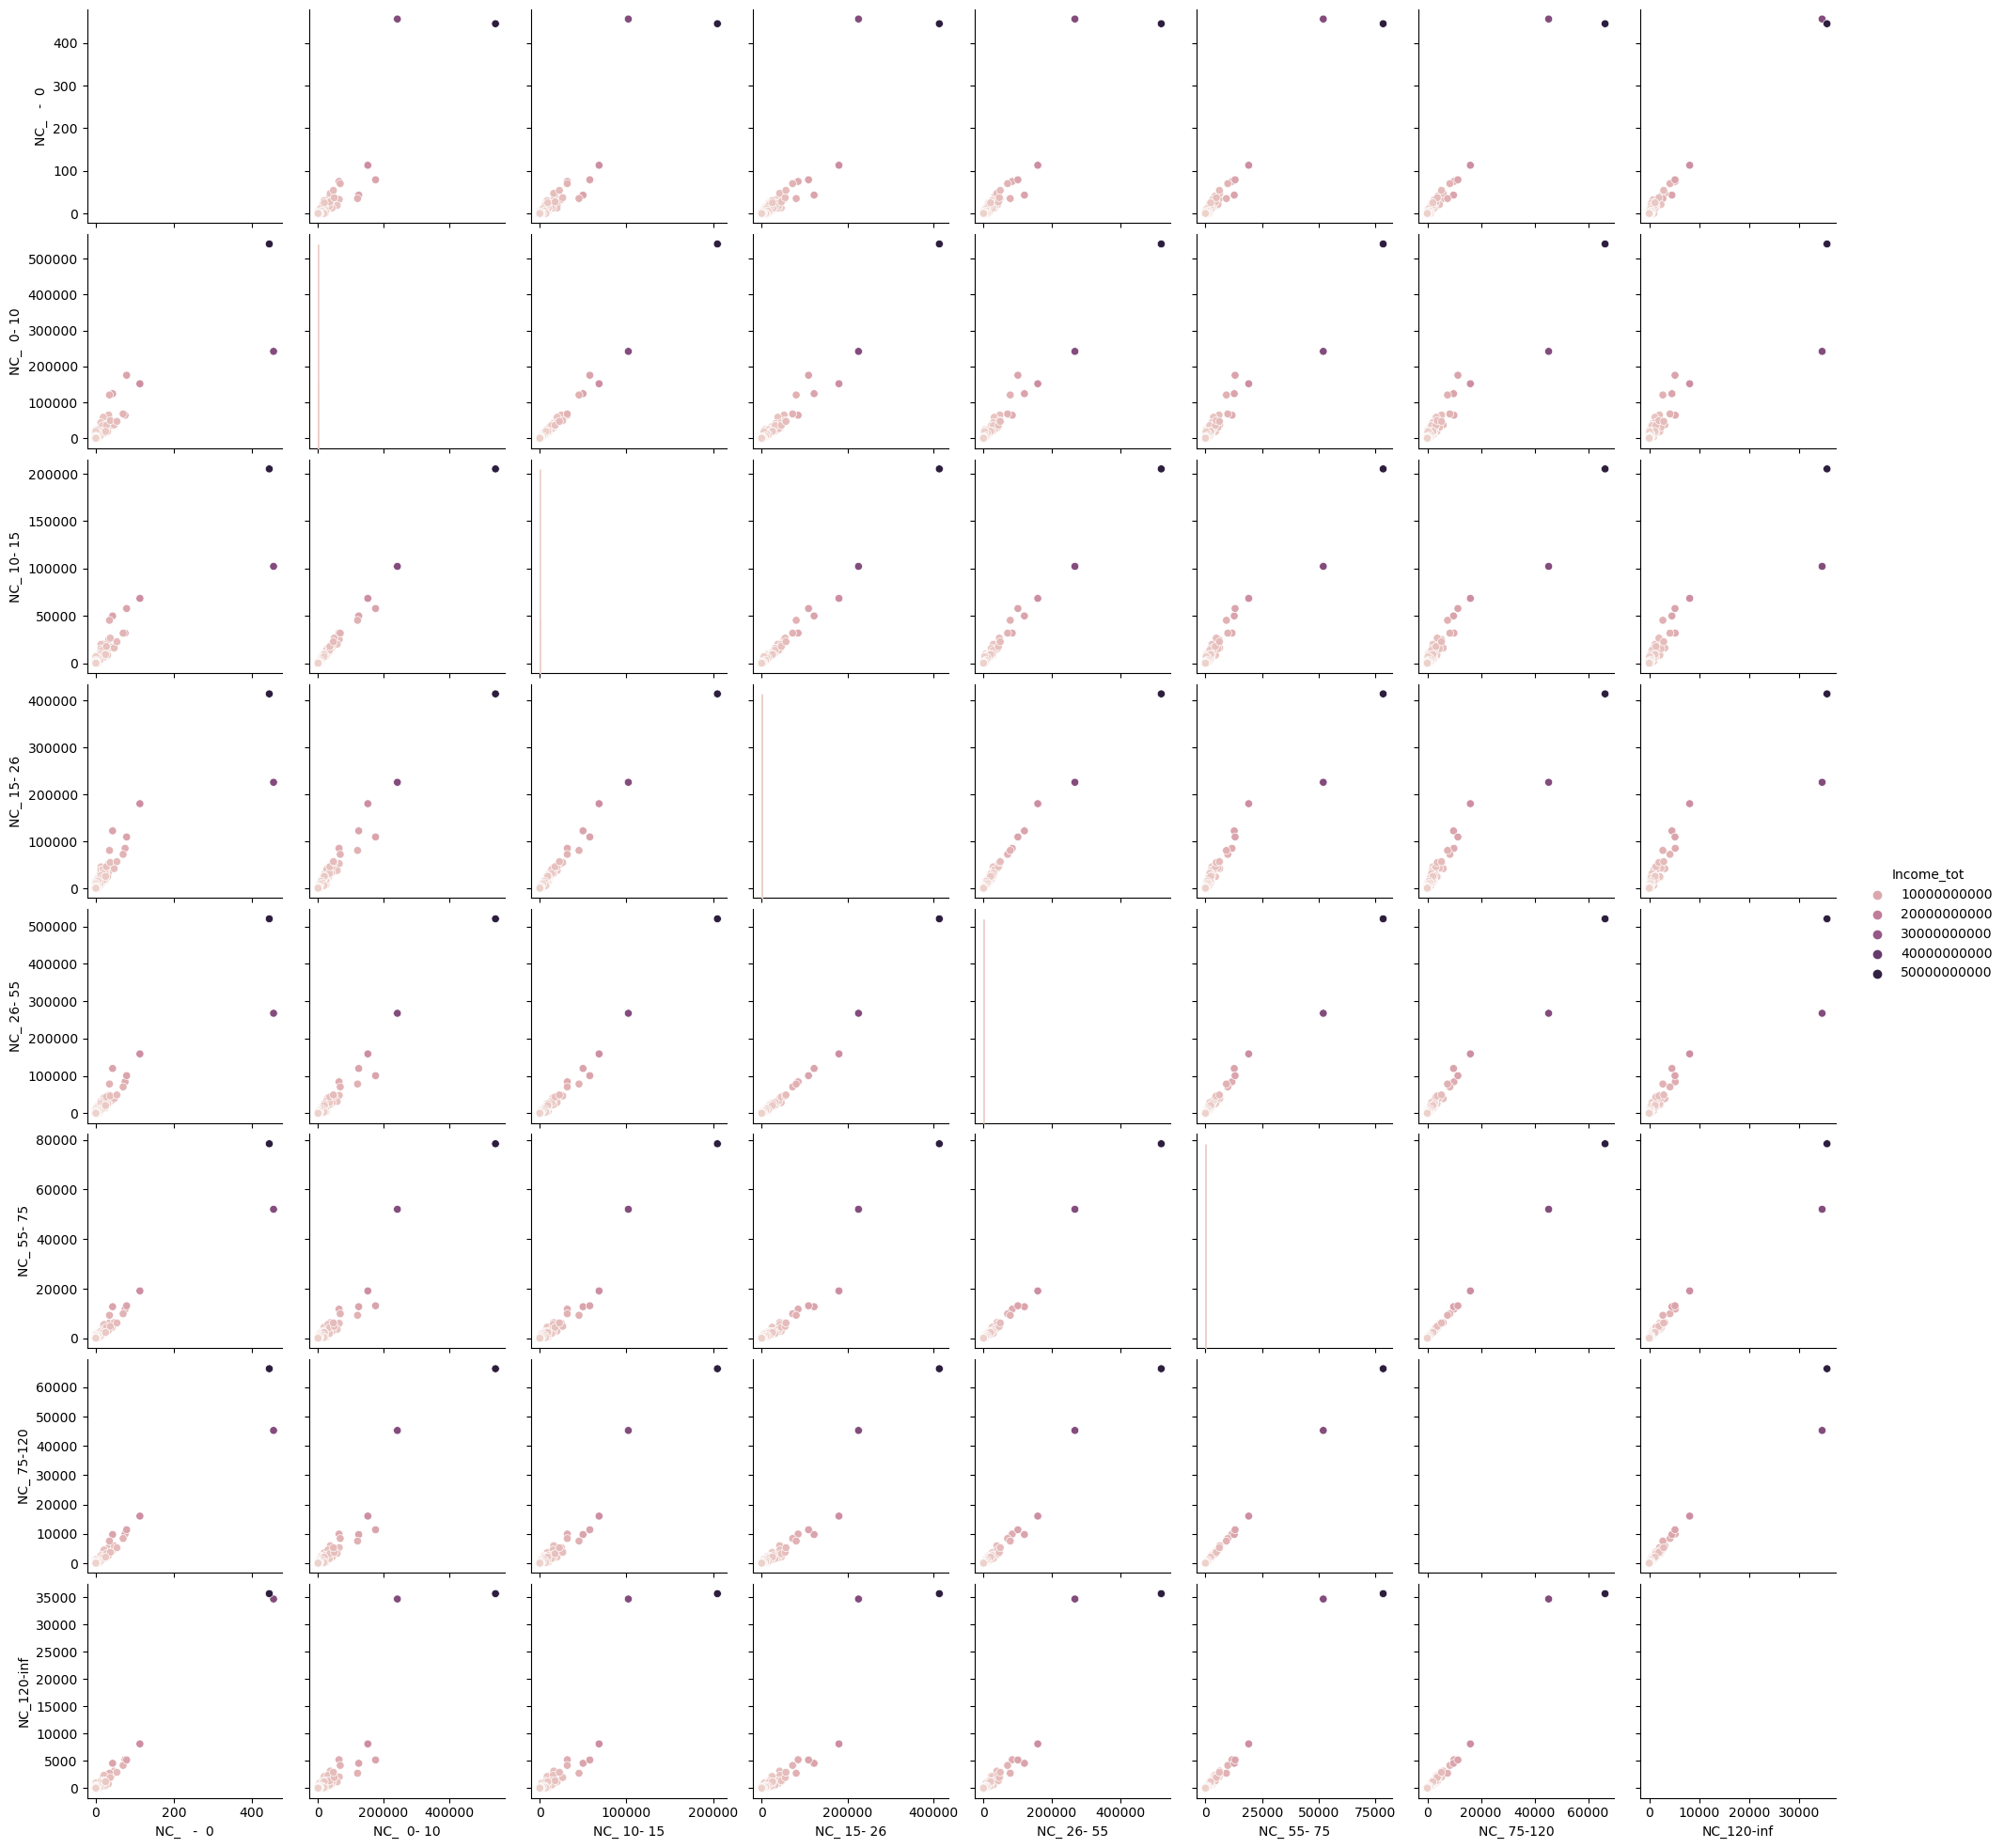

In [75]:
# show data distribution 
sns.pairplot(df, hue='Income_tot')

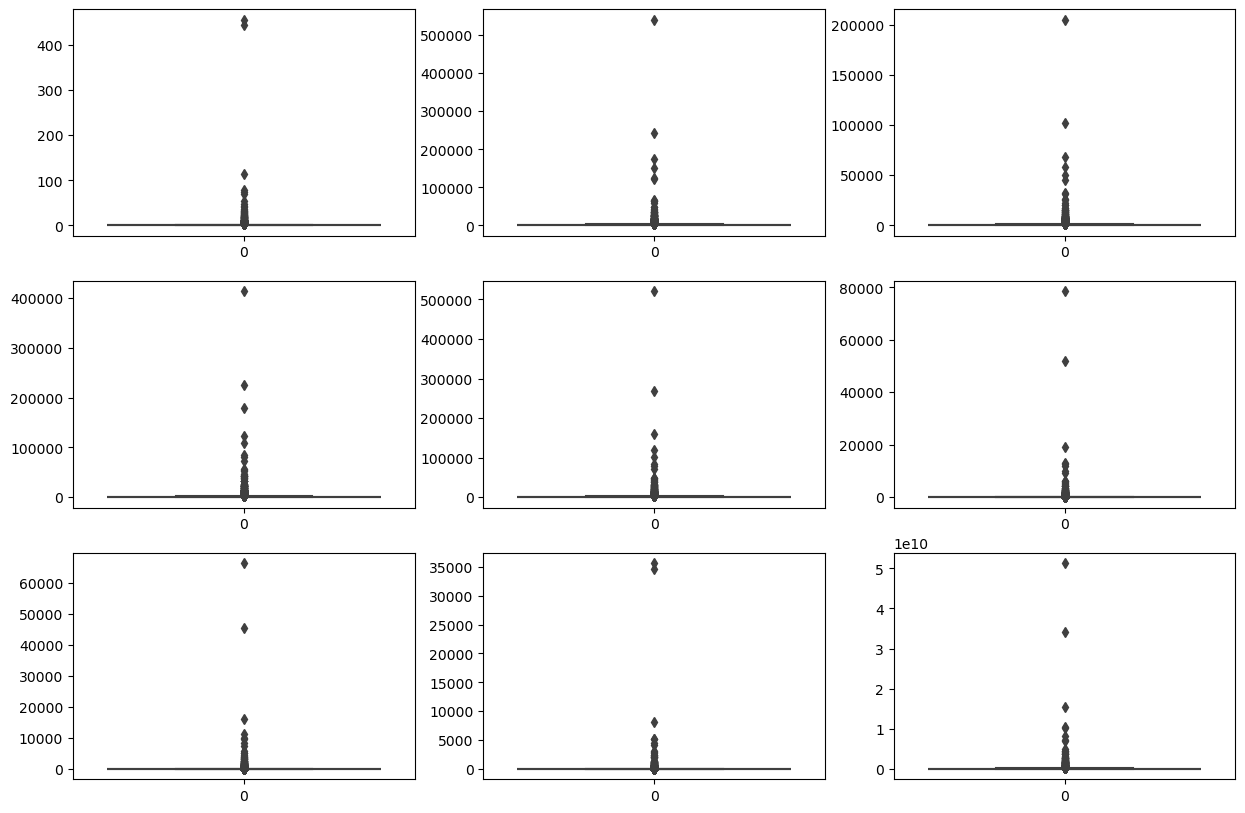

In [76]:
# show boxplots
plt.figure(figsize=(15,10))
pos = 1
for i in df.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[i])
    pos += 1
    

In [77]:
df.describe()

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
count,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7891.000000,7.891000e+03
mean,0.436320,1503.934989,682.607528,1514.311367,1141.186668,112.176403,85.558738,39.987961,1.094664e+08
std,7.708889,8019.878927,3173.115435,6818.879697,7609.469415,1152.192290,978.254230,588.108958,7.821773e+08
min,0.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.388280e+05
25%,0.000000,226.000000,109.000000,207.000000,112.000000,7.000000,4.000000,0.000000,1.193600e+07
50%,0.000000,525.000000,253.000000,520.000000,309.000000,21.000000,14.000000,5.000000,3.099277e+07
75%,0.000000,1256.000000,600.000000,1347.000000,876.500000,68.000000,46.000000,20.000000,8.517508e+07
max,456.000000,540724.000000,205064.000000,413523.000000,520285.000000,78473.000000,66290.000000,35644.000000,5.130494e+10


# Second Step
find the best clustering scheme and compute the quality indexes and the size of the clusters.

In [78]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import ParameterGrid

# try with AgglomerativeClustering
k_range = list(range(2,11))
params = [{'n_clusters': k_range, 'linkage': ['ward', 'complete', 'single', 'average']}]

pg = list(ParameterGrid(param_grid=params))

ac_score = []
for i in range(len(pg)):
    ag_model = AgglomerativeClustering(**(pg[i]))
    y_pred_ac = ag_model.fit_predict(df)
    ac_score.append([pg[i]['linkage'], pg[i]['n_clusters'], silhouette_score(df, y_pred_ac)])

df_ac = pd.DataFrame(data=ac_score, columns=['Linkage', 'K_value', 'Sil_score'])
df_ac.sort_values(by='Sil_score', ascending=False)
df_ac.head()

,Linkage,K_value,Sil_score
0,ward,2,0.996463
1,ward,3,0.985678
2,ward,4,0.948400
3,ward,5,0.948289
4,ward,6,0.854371


In [79]:
# now try KMeans

km_score = []
km_kvalues = list(range(2, 11))
param = [{'n_clusters': km_kvalues}]

pg = list(ParameterGrid(param_grid=param))
for i in range(len(pg)):
    km_model = KMeans(**(pg[i]))
    y_pred_km = km_model.fit_predict(df)
    km_score.append( [pg[i]['n_clusters'], silhouette_score(df, y_pred_km), km_model.inertia_])
    
df_km = pd.DataFrame(data=km_score, columns=['K_value', 'Sil_score', 'Inertia'])
df_km.sort_values(by='Sil_score', ascending=False)
df_km.head()

,K_value,Sil_score,Inertia
0,2,0.996463,1.200055e+21
1,3,0.979195,6.135969e+20
2,4,0.973128,4.770830e+20
3,5,0.944412,2.240475e+20
4,6,0.836347,1.380680e+20


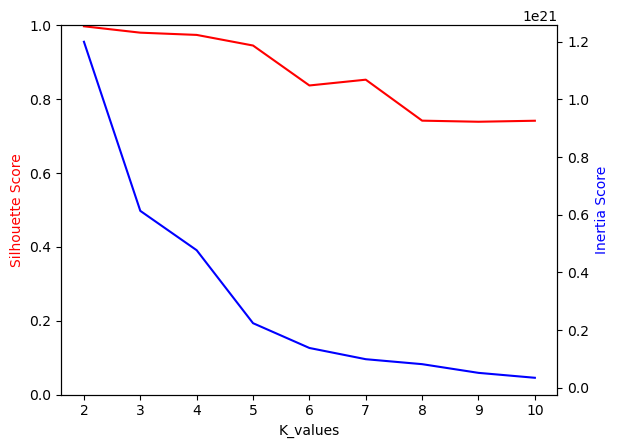

In [80]:
fig, axs = plt.subplots()
axs2 = axs.twinx()

axs.plot(km_kvalues, df_km['Sil_score'], color='red')
axs.set_xlabel('K_values')
axs.set_ylabel('Silhouette Score', color='red')
axs.set_ylim(0,1)

axs2.plot(km_kvalues, df_km['Inertia'], color='blue')
axs2.set_ylabel('Inertia Score', color='blue')


plt.show()

Looks like the best K is $K=3$

In [81]:
# so, let's use this information
k = 3
km_model_best = KMeans(n_clusters=k)
y_pred_km_best = km_model_best.fit_predict(df)

# return cluster sizes
labels, counts = np.unique(y_pred_km_best, return_counts=True)
pd.DataFrame(data=[counts], columns=labels)

,0,1,2
0,7875,2,14


# Third Step
apply data transformation

In [82]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import make_pipeline

preprocessor = make_pipeline(StandardScaler(with_std=False), PowerTransformer(standardize=True))
df_transformed = preprocessor.fit_transform(df)

df_final = pd.DataFrame(data=df_transformed, columns=df.columns)
df_final.head()

,NC_ - 0,NC_ 0- 10,NC_ 10- 15,NC_ 15- 26,NC_ 26- 55,NC_ 55- 75,NC_ 75-120,NC_120-inf,Income_tot
0,-0.184585,1.422501,1.454164,1.458619,1.526294,1.773109,1.904011,1.953686,1.504214
1,-0.184585,-1.198157,-1.203422,-1.111963,-1.035487,-1.006633,-0.967558,-0.851853,-1.023779
2,-0.184585,-0.304510,-0.166282,0.166057,0.446209,0.979416,0.751146,1.320398,0.295241
3,-0.184585,0.992110,1.183379,1.198832,0.652338,0.795573,0.273971,0.218812,0.919793
4,-0.184585,-0.183012,-0.497791,-0.431993,-0.065329,-0.258736,-0.450439,-0.851853,-0.359388


/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/MachineLearning/lib/pyth

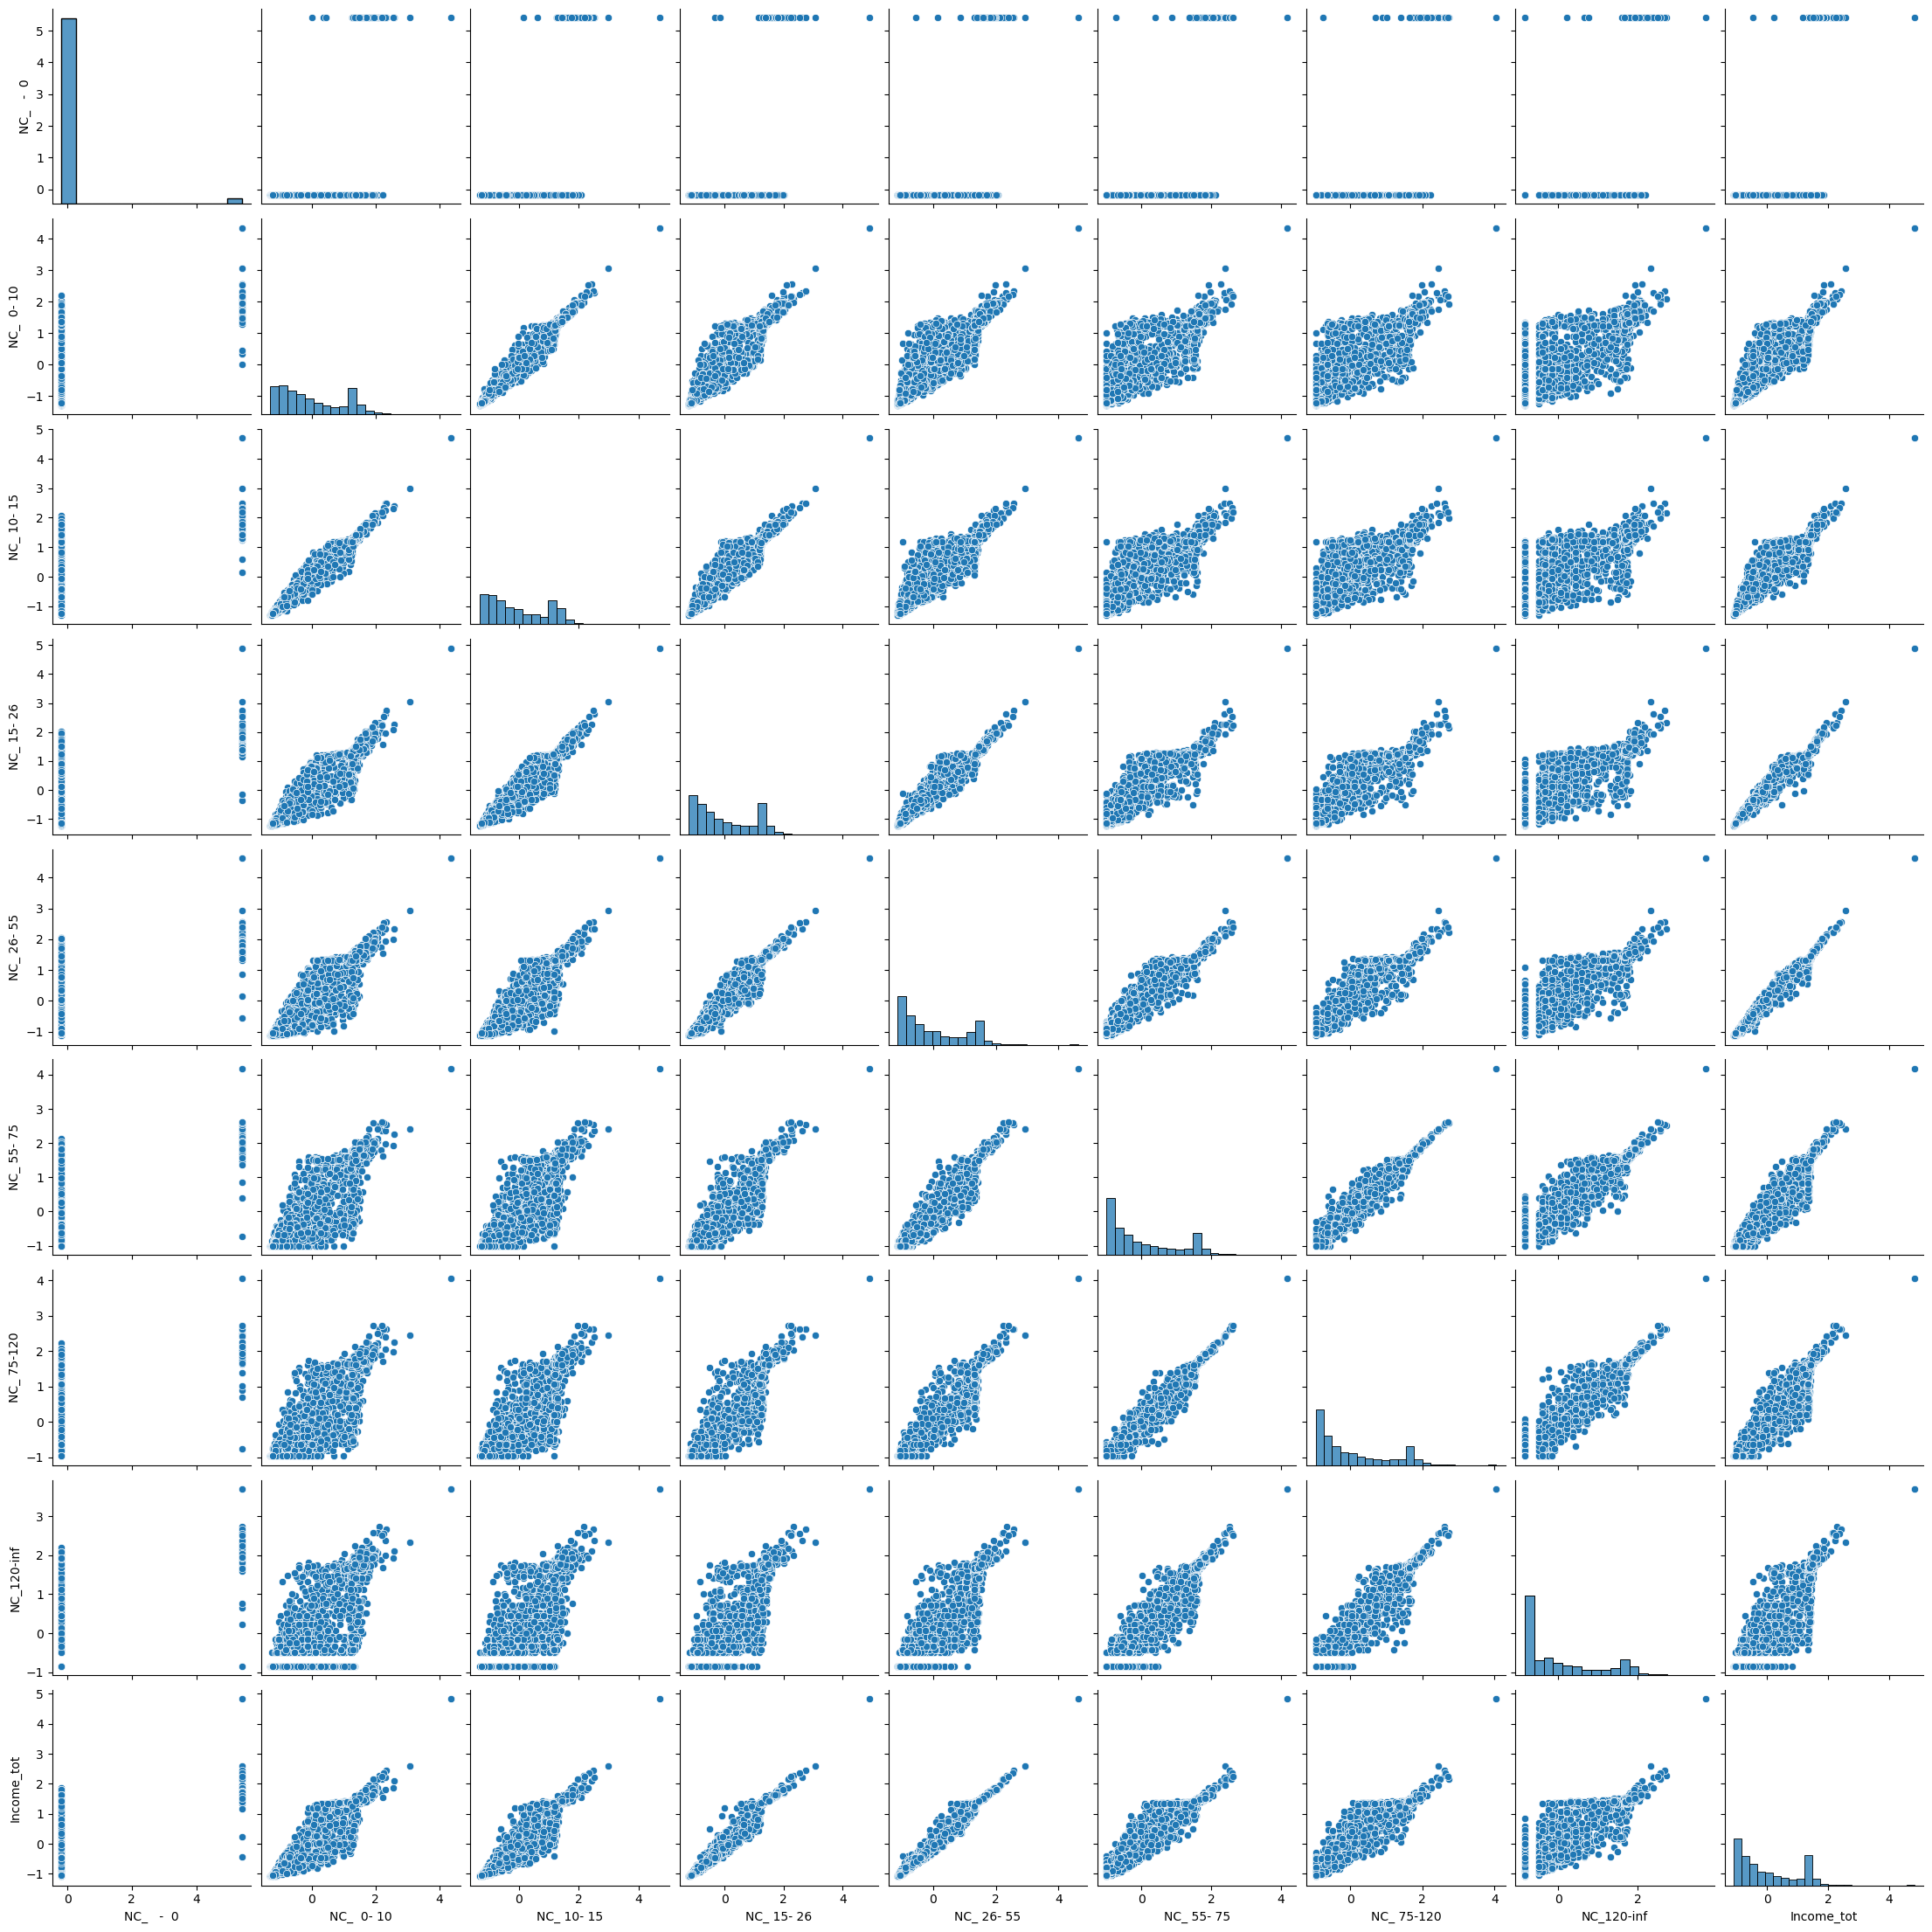

In [83]:
sns.pairplot(df_final.sample(2000))

In [84]:
# apply again KMeans

k_range = list(range(2,11))
score = []

param = [{'n_clusters': k_range}]
pg = list(ParameterGrid(param_grid=param))

for i in range(len(pg)):
    km_est = KMeans(**(pg[i]))
    y_pred = km_est.fit_predict(df_final)
    score.append([pg[i]['n_clusters'], silhouette_score(df_final, y_pred), km_est.inertia_])
    
df_km = pd.DataFrame(data=score, columns=['K_value', 'Sil_score', 'Inertia'])
df_km.sort_values(by='Sil_score', ascending=False)
df_km.head()



,K_value,Sil_score,Inertia
0,2,0.614740,26195.109880
1,3,0.630358,16920.567606
2,4,0.538502,11247.556733
3,5,0.461071,9450.115117
4,6,0.465739,7481.907295


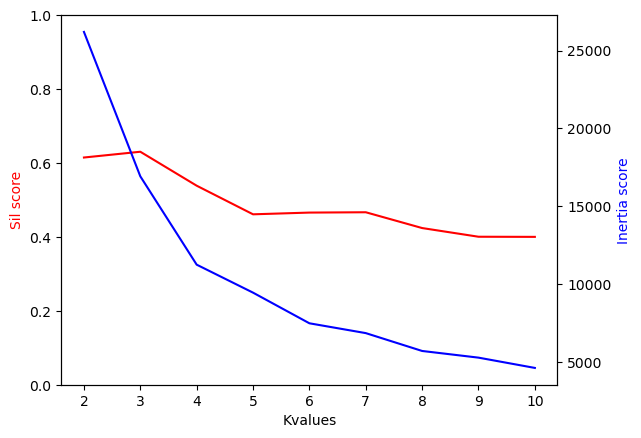

In [85]:
fig, axs = plt.subplots()
axs2 = axs.twinx()

axs.plot(k_range, df_km['Sil_score'], color='red')
axs.set_xlabel('Kvalues')
axs.set_ylabel('Sil score', color='red')
axs.set_ylim(0,1)

axs2.plot(k_range, df_km['Inertia'], color='blue')
axs2.set_ylabel('Inertia score', color='blue')

plt.show()